# Behavioral Cloning

## Quality of code

1. The project submission includes the following files:

a) model.py

b) model.h5

c) drive.py

d) Behavioral Cloning.ipynb

The code is commented and uses the python generator.

## Model Architecture and Training Strategy 

- A Convolutional Neural Network was implemented to perform a regression task. The goal was to use images and corresponding steering angles, to teach/train the network to clone and perform the driving task autonomously. 

- The choice of model was based on evidence from a paper submitted by Nvidia. The model closely replicates the filter sizes and choice of activation unit. 

- Data Augmentation - Center, Left and Right images were used. The images were converted to RGB(since I have used cv2.imread() for reading the images).

1) Augmentation by flipping images.
   The images were flipped and steering measurement adjusted accordingly.
   The flipped images had their corresponding steering angle mutipled by '-1' to ensure they are consistent with the    images.
   Also for the left and righ camera images,the steering angle was offset by an amount equal to the correction amount of 0.2. This was done to teach the model to turn left based on the right camera and turn right for the left camera image with respect to the steering angle for the center image. 
   
2) Augmentation by adjusting brightness.
   The brightness of the images were played around with to add additional variations to existing data.

- Architecture 

- A Lambda layer was added for image normalization.
     
    #### Lambda(lambda x: x / 255.0 - 0.5, input_shape=(160,320,3))
        
        
- Image was cropped to a required size, to avoid the sky, trees and other distractions in the image field of view
  
    ####  Cropping2D(cropping=((70,25),(0,0)))  
    
- (70,25) denotes the number of pixel rows to skip to crop the image, (top, bottom). The second tuple is to crop the side of the image which remains unchanged for this project.
     
        
       
### CNN Layers 

   - Convolution2D(24,5,5, subsample=(2,2),activation='relu')
   - Dropout(0.5)
   - Convolution2D(36,5,5, subsample=(2,2),activation='relu')
   - Dropout(0.5)
   - Convolution2D(48,5,5, subsample=(2,2),activation='relu')
   - Dropout(0.5)
   - Convolution2D(64,3,3,activation='relu')
   - Dropout(0.5)
   - Convolution2D(64,3,3,activation='relu')
   - Dropout(0.5)
   - Flatten() - Convert to one flat layer 
   - Dense(100)
   - Dense(50)
   - Dense(10)
   - Dense(1) - Final outcome is one steering value. 
   
- The data was split into test and training data sets, to ensure that the model maintains its generality 

- To avoid overfitting, the Dropout technique was used. The probaility value was set to 0.5. This helped to better train data without overfitting and maintain generality. 

- An adam optimizer was used for the training process. The metric for error used here was the mean squared error. This choice of adam optimizer was based on the fact that a decent level of success was obtained when used with the traffic sign classifier.

- The training data, was acquired keeping in mind the goal, drive the car autonomously through the center of the road. 2 Laps were completed in the track with a soul focus to drive through the center of the road. One lap was focused on driving through the center of the lane, but in the clockwise direction. There are recovery training images collected later to help the car recover from either the left or right edge of the road back to the center.

## Architecture and Training Documentation

- The choice of model, as described in the previous cell was based on the Nvidia model. 
- The model parameters were obtained after multiple iterations and testing using different parameters. 

#### Architecture 

- A convolutional Neural Network - 5 convolutions layers were used. Three layers using a 5x5 kernel and two layers with a 3x3 kernel. An 'relu' activation unit was chosen. Subsequently the model, was Flattened and run through three full layers and the ouput layer was just one cell, predicting the steering angles. 

- The model architecture was chosen after  testing some basic models with one and two CNN layers.

- As was described previously, the training data, was acquired keeping in mind the goal, drive the car autonomously through the center of the road. 2 Laps were completed in the track One lap was focused on driving through the center of the lane, but in the clockwise direction. This was aimed at improving the generality of the model. There are recovery training images collected later to help the car recover from either the left or right edge of the road back to the center.

- Below are sample training images from the recorded data. Shown below are the center, righ, left and recovery image (from left camera) as captured for the training data set. 

Reference - NVIDIA - End to End Learning for Self Driving Cars - https://arxiv.org/pdf/1604.07316v1.pdf

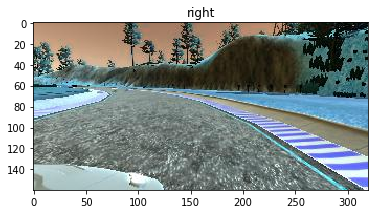

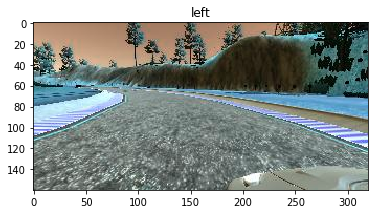

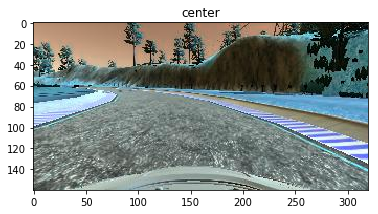

In [2]:
import cv2
import matplotlib.pyplot as plt 
import numpy as np 
%matplotlib inline 
center_image = cv2.imread('../data/IMG/center_2018_08_19_03_32_47_680.jpg')
left_image = cv2.imread('../data/IMG/left_2018_08_19_03_32_47_680.jpg')
right_image = cv2.imread('../data/IMG/right_2018_08_19_03_32_47_680.jpg')

image_list = {'center':center_image,'left':left_image,'right':right_image}

for key,value in image_list.items():
    
    plt.figure()
    plt.title(key)
    plt.imshow(value)